# Python для Анализа Данных

# Лекция 5: Научные вычисления с NumPy и SciPy

**Автор** Полина Полунина

**tg:** @ppolunina

## Библиотека NumPy

NumPy - векторные/научные вычисления. Пакет содержит функциональные средства для работы с многомерными массивами и высокоуровневыми математическими функциями

## Библиотека SciPy

SciPy - научные вычисления. Методы оптимизации, интегрирования, модули обработки сигналов и изображений, статистика, линейная алгебра, сплайны, кластеризация и многое другое. 

Импортирование библиотек:

In [1]:
import numpy as np
import scipy as sp

## 1. Отказ от циклов

### Векторные операции

**Векторные операции** - это операции без циклов.

Пример: поэлементное сложение двух одномерных массивов

In [2]:
# фиксируем генератор случайных чисел
np.random.seed(42)

# создаем два numpy массива
a_numpy = np.random.randint(low=1, high=10, size=5)
b_numpy = np.random.randint(low=1, high=10, size=5)
print('a_numpy: {}, b_numpy: {}, type: {}'.format(a_numpy, b_numpy, type(a_numpy)))

# создаем два аналогичных списка
a_list = a_numpy.tolist()
b_list = b_numpy.tolist()
print('a_list: {}, b_list: {}, type: {}'.format(a_list, b_list, type(a_list)))

a_numpy: [7 4 8 5 7], b_numpy: [3 7 8 5 4], type: <class 'numpy.ndarray'>
a_list: [7, 4, 8, 5, 7], b_list: [3, 7, 8, 5, 4], type: <class 'list'>


* чистый python:

In [3]:
sum_arr=[]
for i in range(len(a_list)):
    sum_arr.append(a_list[i] + b_list[i])
print(sum_arr)

[10, 11, 16, 10, 11]


* векторизированное решение с numpy:

In [4]:
sum_numpy = a_numpy + b_numpy
print(sum_numpy)

[10 11 16 10 11]


In [5]:
%%timeit
sum_arr=[]
for i in range(len(a_list)):
    sum_arr.append(a_list[i] + b_list[i])

1.16 µs ± 81.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%%timeit
sum_numpy = a_numpy + b_numpy

536 ns ± 12.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Вычисление произведения двух матриц


In [7]:
import random

In [8]:
# пример как еще можно фиксировать генератор случайных чисел
random.seed(42)

In [9]:
np.random.seed(42)

# создаем два numpy массива
a_numpy = np.random.randint(low=1, high=10, size=(3,4))
b_numpy = np.random.randint(low=1, high=10, size=(4,3))
print('a_numpy: \n{}, \n\nb_numpy: \n{}, \n\ntype: {}'.format(a_numpy, b_numpy, type(a_numpy)))

a_list = a_numpy.tolist()
b_list = b_numpy.tolist()
print('\na_list: \n{}, \n\nb_list: \n{}, \n\ntype: {}'.format(a_list, b_list, type(a_list)))

a_numpy: 
[[7 4 8 5]
 [7 3 7 8]
 [5 4 8 8]], 

b_numpy: 
[[3 6 5]
 [2 8 6]
 [2 5 1]
 [6 9 1]], 

type: <class 'numpy.ndarray'>

a_list: 
[[7, 4, 8, 5], [7, 3, 7, 8], [5, 4, 8, 8]], 

b_list: 
[[3, 6, 5], [2, 8, 6], [2, 5, 1], [6, 9, 1]], 

type: <class 'list'>


* чистый python

In [10]:
prod_arr = [[],[],[]]

for i in range(len(a_list)):
    for j in range(len(a_list)):
        sum_ = 0
        for k in range(len(b_list)):
            sum_ += a_list[i][k] * b_list[k][j]
        prod_arr[i].append(sum_)

In [11]:
print(prod_arr)

[[75, 159, 72], [89, 173, 68], [87, 174, 65]]


* векторизированное решение с numpy

In [12]:
c = np.zeros((a_numpy.shape[0], b_numpy.shape[1]))
for i in range(a_numpy.shape[0]):
    for j in range(b_numpy.shape[1]):
        for s in range(a_numpy.shape[1]):
            c[i, j] += a_numpy[i, s] * b_numpy[s, j]

In [13]:
print(c)

[[ 75. 159.  72.]
 [ 89. 173.  68.]
 [ 87. 174.  65.]]


* встроенный метод numpy

In [14]:
a_numpy.dot(b_numpy)

array([[ 75, 159,  72],
       [ 89, 173,  68],
       [ 87, 174,  65]])

In [15]:
%%timeit
prod_arr = [[],[],[]]

for i in range(len(a_list)):
    for j in range(len(a_list)):
        sum_ = 0
        for k in range(len(b_list)):
            sum_ += a_list[i][k] * b_list[k][j]
        prod_arr[i].append(sum_)

11.9 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit
c = np.zeros((a_numpy.shape[0], b_numpy.shape[1]))
for i in range(a_numpy.shape[0]):
    for j in range(b_numpy.shape[1]):
        for s in range(a_numpy.shape[1]):
            c[i, j] += a_numpy[i, s] * b_numpy[s, j]

39.6 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit
a_numpy.dot(b_numpy)

980 ns ± 66.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Пример: Вычисления цепочками

Дана функция

$f(x) = \frac{1}{2}x^TAx + b^Tx + c$

ее градиент

$\nabla{f(x)} = \frac{1}{2}(A + A^T)x + b$

In [18]:
np.random.seed(42)
A = np.random.randint(low=1, high=10, size=(3,3))
print(A)

[[7 4 8]
 [5 7 3]
 [7 8 5]]


In [19]:
x = np.random.randint(1,10,3)
b = np.random.randint(1,10,3)
c = np.random.randint(1,10,1)
print('x:', x)
print('b:', b)
print('c:', c)

x: [4 8 8]
b: [3 6 5]
c: [2]


In [20]:
0.5 * x.T.dot(A).dot(x) + b.T.dot(x) + c

array([1278.])

In [21]:
0.5 * (A + A.T).dot(x) + b

array([127., 124., 119.])

In [22]:
x.T@(A)

array([124, 136,  96])

In [23]:
x.T.dot(A)

array([124, 136,  96])

#### Линейная регрессия с numpy своими руками

**Задача Линейной Регрессии в трех словах**

Есть данные, например, цена дома. Кроме цены, нам известна еще и общая площадь дома. Хотим научиться определять цену дома по его площади.

Модель - линейная:

HousePrice = a + b * TotalArea + error

Коэффициенты a и b определяются в явном виде решением соответствующей оптимизационной задачи методом наименьших квадратов (МНК). 

Готовые формулы:

$\hat{b} = \frac{\sum(x_i - average(x))(y_i - average(y))}{\sum(x_i - average(x))^2}$

$\hat{a} = average(x) - \hat{b} * average(y)$


In [25]:
# Загрузим данные
import pandas as pd
df = pd.read_csv('train.csv')
TotalArea = df['GrLivArea'].values
HousePrice = df['SalePrice'].values

In [26]:
num = ((TotalArea - TotalArea.mean()) * (HousePrice - HousePrice.mean())).sum()

In [27]:
den = np.sum((TotalArea - TotalArea.mean())**2)

In [28]:
b = num / den
a = HousePrice.mean() - b * TotalArea.mean()

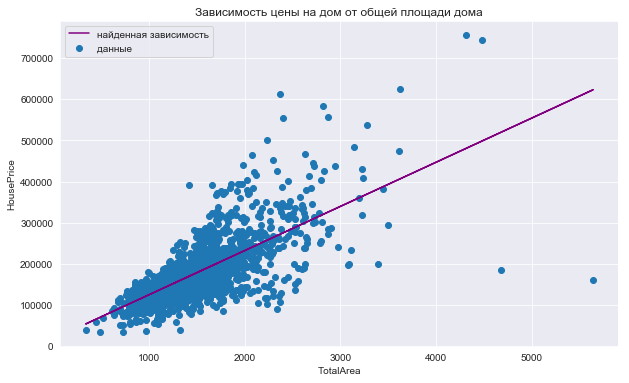

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
plt.figure(figsize=(10,6))
plt.scatter(TotalArea, HousePrice, label='данные')
plt.plot(TotalArea, a + b * TotalArea, 'purple', label='найденная зависимость')
plt.title('Зависимость цены на дом от общей площади дома')
plt.xlabel('TotalArea')
plt.ylabel('HousePrice')
plt.legend()
plt.show()


## Специальные структуры

### 1. Разреженные матрицы

Разреженная матрица - это матрица, внутри которой преимущественно нулевые элементы

In [30]:
from scipy.sparse import csr_matrix

A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [31]:
S = csr_matrix(A)
print(S)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2


In [32]:
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [33]:
# процент нулевых элементов
sparsity = 1 - np.count_nonzero(A) / A.size
print(sparsity)

0.7222222222222222


In [34]:
1 - S.count_nonzero() / A.size

0.7222222222222222

#### Операции с разреженными матрицами

In [35]:
A

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 1],
       [0, 0, 0, 2, 0, 0]])

In [36]:
print(S / 2)

  (0, 0)	0.5
  (0, 3)	0.5
  (1, 2)	1.0
  (1, 5)	0.5
  (2, 3)	1.0


In [37]:
print(S.dot(S.T).todense())

[[2 0 2]
 [0 5 0]
 [2 0 4]]


In [38]:
print(S.dot(S.T))

  (0, 2)	2
  (0, 0)	2
  (1, 1)	5
  (2, 2)	4
  (2, 0)	2


### 2. Матрицы Тоеплица (или Тёплица)

Матрица Тоеплица - это матрица, у которой на диагоналях, параллельных главной, стоят одинаковые элементы 

<img src="pic_1.png">


**Применение**

Для упрощения вычислений:
* автокорреляции
* кросс-корреляции
* конволюции (свертки)
* скользящего среднего
* и т.д.

In [39]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [40]:
from scipy import linalg
print(sp.linalg.toeplitz(np.arange(5)))

[[0 1 2 3 4]
 [1 0 1 2 3]
 [2 1 0 1 2]
 [3 2 1 0 1]
 [4 3 2 1 0]]


In [41]:
print(sp.linalg.toeplitz(np.arange(5), [1, 11, 12,13, 14]))

[[ 0 11 12 13 14]
 [ 1  0 11 12 13]
 [ 2  1  0 11 12]
 [ 3  2  1  0 11]
 [ 4  3  2  1  0]]


**Рассмотрим пример:**
    
Скользящее среднее (moving average, running average, rolling average) - это среднее значение за какой-то период, которое нужно вычислять с какой-то периодичностью.

Например:
* средняя выручка за последние 5 дней, которую необходимо считать на ежедневной основе
* среднее кол-во уникальных посетителей приложения за последние 3 дня

**Задача**:

Есть (искусственный) массив, содержащий кол-во просмотров рекламной акции за последние 30 дней. Посчитать скользящее среднее за 5 дней на ежедневной основе.

In [42]:
# создаем массив из случайных чисел, соответствующий просмотрам акции
np.random.seed(42)
ad_views = np.random.randint(low=0, high=1000, size=30)
print(ad_views)

[102 435 860 270 106  71 700  20 614 121 466 214 330 458  87 372  99 871
 663 130 661 308 769 343 491 413 805 385 191 955]


In [43]:
# создаем матрицу Тоеплица
help_toeplitz = sp.linalg.toeplitz(ad_views, np.zeros(5))
print(help_toeplitz)

[[102.   0.   0.   0.   0.]
 [435. 102.   0.   0.   0.]
 [860. 435. 102.   0.   0.]
 [270. 860. 435. 102.   0.]
 [106. 270. 860. 435. 102.]
 [ 71. 106. 270. 860. 435.]
 [700.  71. 106. 270. 860.]
 [ 20. 700.  71. 106. 270.]
 [614.  20. 700.  71. 106.]
 [121. 614.  20. 700.  71.]
 [466. 121. 614.  20. 700.]
 [214. 466. 121. 614.  20.]
 [330. 214. 466. 121. 614.]
 [458. 330. 214. 466. 121.]
 [ 87. 458. 330. 214. 466.]
 [372.  87. 458. 330. 214.]
 [ 99. 372.  87. 458. 330.]
 [871.  99. 372.  87. 458.]
 [663. 871.  99. 372.  87.]
 [130. 663. 871.  99. 372.]
 [661. 130. 663. 871.  99.]
 [308. 661. 130. 663. 871.]
 [769. 308. 661. 130. 663.]
 [343. 769. 308. 661. 130.]
 [491. 343. 769. 308. 661.]
 [413. 491. 343. 769. 308.]
 [805. 413. 491. 343. 769.]
 [385. 805. 413. 491. 343.]
 [191. 385. 805. 413. 491.]
 [955. 191. 385. 805. 413.]]


In [44]:
# считаем скользящее среднее
help_toeplitz.mean(axis=1)[4:]

array([354.6, 348.4, 401.4, 233.4, 302.2, 305.2, 384.2, 287. , 349. ,
       317.8, 311. , 292.2, 269.2, 377.4, 418.4, 427. , 484.8, 526.6,
       506.2, 442.2, 514.4, 464.8, 564.2, 487.4, 457. , 549.8])

### 3. SVD разложение (сингулярное разложение)

SVD разложение - широкоиспользуемый метод понижения размерности, в том числе для задач машинного обучения.

**Просто о сложном**

Мы хотим научиться предсказывать, например, к какому классу принадлежит цветок ирисов по каким-то данным. Наши данные - это матрица A, в которой по столбцам хранятся признаки, а по строкам - различные наблюдения.

Матрицу А можно представить в виде $A = U\Sigma V^*$, где:

* $\Sigma$ - матрица, у которой по диагонали стоят так называемые сингулярные числа матрицы А
* $U$ - матрица из левых сингулярных векторов
* $V^*$ - сопряженно-транспонированная матрица их правых сингулярных векторов

При этом, $U$ и $V$ - так называемые унитарные матрицы, т.е. $UU^* = I$ и $VV^* = I$, $I$ = единичная матрица, т.е. матрица с единичками по диагонали (остальные элементы нулевые)

**Зачем все это нужно?**

Теорема Эккарта-Янга в вольном изложении :)

Исходную матрицу $А$ можно, в каком-то смысле, наилучшим образом приблизить другой матрицей меньшей размерности $A_k$.

В каком смысле наилучшим образом? Фробениусова норма разности матриц $A$ и $A_k$ минимальна, при ограничении $rank(A_k) = k$.

Такая матрица $A_k$ получается из сингулярного разложения $A_k = U_k\Sigma_k V^{*}_{k}$, где используются только k первых сингулярных чисел матрицы $А$.


**Пример**

In [45]:
np.random.seed(42)
A = np.random.randint(low=0, high=10, size=(3,3))
print(A)

[[6 3 7]
 [4 6 9]
 [2 6 7]]


In [46]:
A_ = A.dot(A.T)

In [47]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
np.sqrt(np.linalg.eigvals(A_)) * np.eye(3)

array([[17.40194601,  0.        ,  0.        ],
       [ 0.        ,  3.61808556,  0.        ],
       [ 0.        ,  0.        ,  0.28588795]])

In [49]:
U, S, V = np.linalg.svd(A)

**Пример с цветами Ириса**

In [50]:
from sklearn.datasets import load_iris
data = load_iris()

In [51]:
data_ = data.data
data_[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [52]:
U, S, V = np.linalg.svd(data_)

In [53]:
S

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

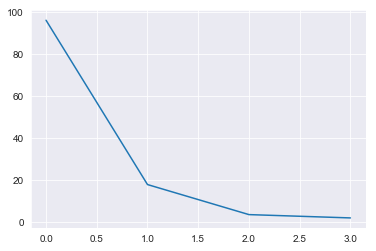

In [54]:
plt.plot(S)
plt.show()

In [55]:
A_2 = (U[:, :2].dot(S[:2] * np.eye(2))).dot(V[:2, :2])

In [56]:
data_f = pd.DataFrame(A_2)
data_f.head()
data_f['target'] = data.target

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


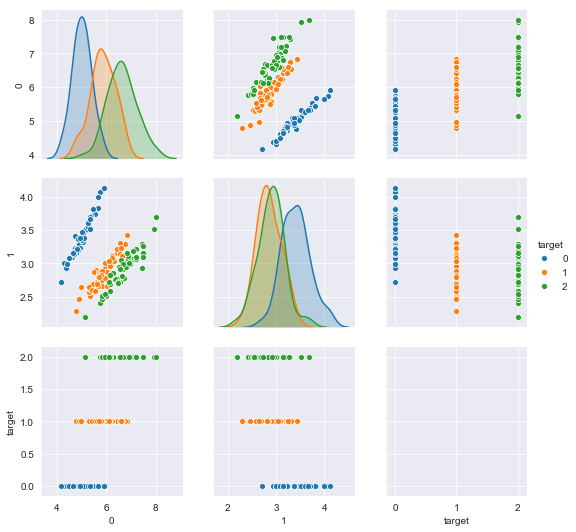

In [57]:
sns.pairplot(data_f, hue='target')
plt.show()